In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

with np.load('dimredux-challenge-01-data.npz') as fh:
    data_x = fh['data_x']
    validation_x = fh['validation_x']
    validation_y = fh['validation_y']

# TRAINING DATA: 
print(data_x.shape, data_x.dtype)

# VALIDATION DATA: X + y
print(validation_x.shape, validation_x.dtype)
print(validation_y.shape, validation_y.dtype)


(100000, 3) float64
(1000, 3) float64
(1000,) int32


# Visualization

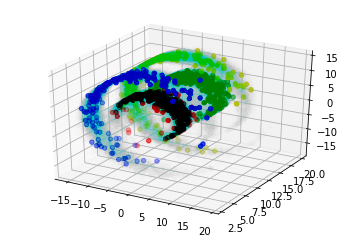

In [2]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = zip(*data_x)
ax.scatter(x,y,z,c='c',alpha=0.005)
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x[validation_y == cls])
    ax.scatter(x,y,z,c=color)
    


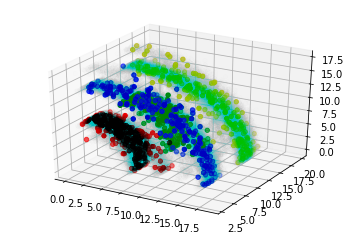

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = zip(*data_x)
ax.scatter(np.abs(x),y,np.abs(z),c='c',alpha=0.005)
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x[validation_y == cls])
    ax.scatter(np.abs(x),y,np.abs(z),c=color)

In [4]:
# data_x[:,0] = np.abs(data_x[:,0])
# data_x[:,2] = np.abs(data_x[:,2])
# 
# validation_x[:,0] = np.abs(validation_x[:,0])
# validation_x[:,2] = np.abs(validation_x[:,2])

In [5]:
data_x[:,0]

array([ -7.74340987, -10.57155779, -14.37425187, ...,   3.11803615,
         5.09292333,  -9.36430901])

# Remove mean and correleation (whitening)

In [6]:
mean = data_x.mean(axis=0)
data_x_centered = data_x - mean
validation_x_centered = validation_x - mean

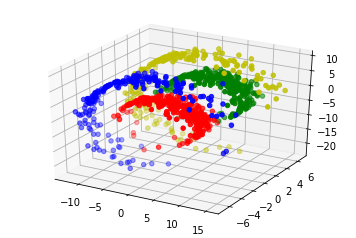

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x_centered[validation_y == cls])
    ax.scatter(x,y,z,c=color)

In [193]:
def whiten(X,X_val,fudge=1E-5):
    
    # the matrix X should be observations-by-components
    mean = np.mean(X, axis = 0)
    X_val -= mean
    X -= mean
    
    # get the covariance matrix
    Xcov = np.dot(X.T,X) / X.shape[0]

    # eigenvalue decomposition of the covariance matrix
    val, Vec = np.linalg.eigh(Xcov)
    
    Xrot = np.dot(X, Vec)
    X_val_rot = np.dot(X_val, Vec)
    
    X_white = Xrot / np.sqrt(val + 1e-5)
    X_val_white = X_val_rot / np.sqrt(val + 1e-5)

    # a fudge factor can be used so that eigenvectors associated with
    # small eigenvalues do not get overamplified.
    #D = np.diag(1. / np.sqrt(val+fudge))

    # whitening matrix
    #W = np.dot(np.dot(V, D), V.T)

    # multiply by the whitening matrix
    #X_white = np.dot(X, W)

    return X_white, X_val_white

In [194]:
data_x_white,validation_x_white = whiten(data_x,validation_x)
#normalizing_factors = 1/np.std(data_x_white, axis = 0) #1/np.abs(data_x_white).mean(axis=0)
#data_x_white *= normalizing_factors
#validation_x_white = np.dot(validation_x_centered,W) * normalizing_factors

In [195]:
data_x_white.shape

(100000, 3)

In [196]:
validation_x_white.shape

(1000, 3)

In [197]:
normalizing_factors

array([ 316.22776602,  316.22776602,  316.22776602])

In [198]:
data_x_white.std(axis=0)

array([ 0.99999967,  0.99999988,  0.99999992])

In [199]:
validation_x_white.std(axis=0)

array([ 0.99644213,  0.97597863,  0.9817804 ])

In [200]:
validation_x_white.mean()

0.0091424848968534502

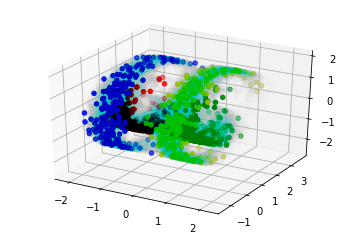

In [201]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x,y,z = zip(*data_x_white)
ax.scatter(x,y,z,c='c',alpha=0.005)
for cls, color in enumerate(['r','g','y','b']):
    x,y,z = zip(*validation_x_white[validation_y == cls])
    ax.scatter(x,y,z,c=color)

In [202]:
validation_y[:200]

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

# Build time lagged auto encoder

In [203]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as utils
from torch.autograd import Variable

In [204]:
class timeLaggedDataset(torch.utils.data.Dataset):
    def __init__(self, x_array, x_lag, y_lag, overlay=0):
        """
        x_array: array with time dimension at axis=0 
        x_lag: length of x
        y_lag: length of y
        overlay: amount of shared datapoints at end of x and beginning of y
        """
        #x_array = np.expand_dims(x_array, axis=2)
        self.data = torch.from_numpy(x_array).float()

    def __len__(self):
        return len(self.data) - x_lag + 1 - y_lag + overlay

    def __getitem__(self, i):
        return (self.data[i:i+x_lag]).permute(1,0), self.data[i+x_lag-overlay:i+x_lag+y_lag-overlay].permute(1,0)

In [205]:
x_lag = 4
y_lag = 1
overlay = 0
batch_size = 200
lagged_dset = timeLaggedDataset(data_x_white,x_lag,y_lag,overlay)
data_loader = utils.DataLoader(lagged_dset, batch_size=batch_size, shuffle=True)

In [260]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layers = nn.Sequential(
            
            nn.Conv1d(3,128,2,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv1d(128,128,2,stride=1,padding=1),
            nn.ReLU(),
            
            #nn.Conv1d(x_lag,15,1),
            # #nn.ReLU(),
            # #nn.Linear(x_lag*3,32),
            # #nn.ReLU(),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Linear(32,16),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(16,8),
            # nn.ReLU(),
            # nn.Linear(8,1),
            # #nn.ReLU(),
            # #nn.Linear(4,1),
            # #nn.ReLU()
        )
        
        self.fclayers = nn.Sequential(
            nn.Linear(768,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,32),
            nn.ReLU(),
            nn.Linear(32,1),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(16,8),
            # nn.ReLU(),
            # nn.Linear(8,1),
            # #nn.ReLU(),
            # #nn.Linear(4,1),
            # #nn.ReLU()
        )
                      
    def forward(self,x):
        #out = x.view(x.size()[0], -1)
        #print(out.shape)
        out = self.layers(x)
        #print(out.size())
        out = out.view(out.size()[0], -1)
        #print(out.size())
        out = self.fclayers(out)
        
        return out

    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.fclayers = nn.Sequential(
            nn.Linear(1,8),
            nn.ReLU(),
            nn.Linear(8,16),
            nn.ReLU(),
            #nn.Linear(64,y_lag*3),
        )
        self.convlayers = nn.Sequential(
            nn.ConvTranspose1d(4,8,2),
            nn.ReLU(),
            nn.ConvTranspose1d(8,8,4),
            nn.ReLU(),
            #nn.ConvTranspose1d(16,16,3),
            nn.Conv1d(8,8,3),
            nn.ReLU(),
            nn.Conv1d(8,3,3),
            
            #nn.ReLU(),
            #nn.Conv1d(64,3,3),
            #nn.Conv1d(x_lag,15,1),
            #nn.ReLU(),
            
            #nn.Linear(1,4),
            #nn.ReLU(),
            #nn.Linear(1,8),
            #nn.ReLU(),
            #nn.Linear(8,16),
            #nn.ReLU(),
            #nn.Linear(16,16),
            #nn.Dropout(0.3),
            #nn.ReLU(),
            #nn.Linear(16,16),
            #nn.Dropout(0.3),
            #nn.ReLU(),
            #nn.Linear(16,32),
            #nn.ReLU(),
            #nn.Linear(32,64),
            #nn.ReLU(),
            #nn.Linear(64,y_lag*3),
        )
        self.test = nn.Sequential(
            nn.Linear(1,3),
            nn.ReLU(),
            nn.Linear(3,6),
            nn.ReLU(),
            nn.Linear(6,12),
            nn.ReLU(),
            nn.Linear(12,12),
            nn.ReLU(),
            nn.Linear(12,3)
        )
        self.test2 = nn.Sequential(
            nn.Linear(1,2),
            nn.ReLU(),
            nn.Linear(2,4),
            nn.ReLU(),
            nn.Linear(4,3),
            # nn.ReLU(),
            # nn.Linear(16,16),
            # nn.ReLU(),
            # nn.Linear(16,128),
            # nn.ReLU(),
            # nn.Linear(128,3),
            #nn.ReLU(),
            #nn.Linear(12,12),
            #nn.ReLU(),
            #nn.Linear(12,12),
            #nn.ReLU(),
            #nn.Linear(12,6),
        )
                      
                      
    def forward(self,x):
        #out = self.fclayers(x)
        out = self.test(x)
        out = out.view(x.size()[0],-1,y_lag)
        #print("afer reshape: ", out.size())
        #out = self.convlayers(out)
        #print("afer conv: ", out.size())
        return out
    


class Encoder(nn.Module):
    def __init__(self):
        super(Encoder,self).__init__()
        self.layers = nn.Sequential(
            
            nn.Conv1d(3,64,4,stride=1,padding=2),
            nn.ReLU(),
            nn.Conv1d(64,64,4,stride=1,padding=2),
            nn.ReLU(),
            #nn.Conv1d(x_lag,15,1),
            # #nn.ReLU(),
            # #nn.Linear(x_lag*3,32),
            # #nn.ReLU(),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(32,32),
            # nn.ReLU(),
            # nn.Linear(32,16),
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(16,8),
            # nn.ReLU(),
            # nn.Linear(8,1),
            # #nn.ReLU(),
            # #nn.Linear(4,1),
            # #nn.ReLU()
        )
        
        self.fclayers = nn.Sequential(
            nn.Linear(1152,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,32),
            nn.ReLU(),
            nn.Linear(32,1),
            # nn.Softmax(dim=1),
            # nn.Sigmoid()
            # nn.ReLU(),
            # nn.Dropout(0.3),
            # nn.Linear(16,8),
            # nn.ReLU(),
            # nn.Linear(8,1),
            # #nn.ReLU(),
            # #nn.Linear(4,1),
            # #nn.ReLU()
        )
                      
    def forward(self,x):
        #out = x.view(x.size()[0], -1)
        #print(out.shape)
        out = self.layers(x)
        #print(out.size())
        out = out.view(out.size()[0], -1)
        #print(out.size())
        out = self.fclayers(out)
        #print("after softmax:", out)
        
        #print("after argmax:", out)
        
        
        return out

    
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder,self).__init__()
        self.fclayers = nn.Sequential(
            nn.Linear(1,8),
            nn.ReLU(),
            nn.Linear(8,16),
            nn.ReLU(),
            #nn.Linear(64,y_lag*3),
        )
        self.convlayers = nn.Sequential(
            nn.ConvTranspose1d(4,8,2),
            nn.ReLU(),
            nn.ConvTranspose1d(8,8,4),
            nn.ReLU(),
            #nn.ConvTranspose1d(16,16,3),
            nn.Conv1d(8,8,3),
            nn.ReLU(),
            nn.Conv1d(8,3,3),
            
            #nn.ReLU(),
            #nn.Conv1d(64,3,3),
            #nn.Conv1d(x_lag,15,1),
            #nn.ReLU(),
            
            #nn.Linear(1,4),
            #nn.ReLU(),
            #nn.Linear(1,8),
            #nn.ReLU(),
            #nn.Linear(8,16),
            #nn.ReLU(),
            #nn.Linear(16,16),
            #nn.Dropout(0.3),
            #nn.ReLU(),
            #nn.Linear(16,16),
            #nn.Dropout(0.3),
            #nn.ReLU(),
            #nn.Linear(16,32),
            #nn.ReLU(),
            #nn.Linear(32,64),
            #nn.ReLU(),
            #nn.Linear(64,y_lag*3),
        )
        self.test = nn.Sequential(
            nn.Linear(1,3),
            nn.ReLU(),
            nn.Linear(3,6),
            nn.ReLU(),
            nn.Linear(6,12),
            nn.ReLU(),
            nn.Linear(12,12),
            nn.ReLU(),
            nn.Linear(12,6)
        )
        self.test2 = nn.Sequential(
            nn.Linear(1,4),
            nn.ReLU(),
            nn.Linear(4,32),
            nn.ReLU(),
            nn.Linear(32,6),
            #nn.ReLU(),
            #nn.Linear(12,12),
            #nn.ReLU(),
            #nn.Linear(12,12),
            #nn.ReLU(),
            #nn.Linear(12,6),
        )
                      
                      
    def forward(self,x):
        #print(x.shape)
        #out = torch.zeros(x.size()[0],4)
        #out.scatter_(1,x,1)
        #for i,j in enumerate(x):
        #    out[i,j] = 1.
        #print(out)
        #out = Variable(out)
        
        out = self.test2(x)

        out = out.view(x.size()[0],-1,y_lag)
        
        #out = self.fclayers(x)
        #print("afer reshape: ", out.size())
        #out = self.convlayers(out)
        #print("afer conv: ", out.size())
        return out
    


In [261]:
encoder = Encoder()
decoder = Decoder()

In [262]:
loss_func = nn.MSELoss(size_average=True)
for x,y in data_loader:
    print(x.shape,y.shape)
    test = x.view(x.size()[0], -1)
    print(test.shape)
    out = encoder(x)
    #print("Out:", out)
    print(out.shape)
    out = decoder(out)
    print("loss: ", loss_func(out,y), out.size(), y.size())
    print(out.shape)
    #print(x[0])
    #print(y[0])
    break
    

torch.Size([200, 3, 4]) torch.Size([200, 3, 1])
torch.Size([200, 12])
torch.Size([200, 1])
loss:  tensor(1.0291) torch.Size([200, 3, 1]) torch.Size([200, 3, 1])
torch.Size([200, 3, 1])


In [263]:
learning_rate = 0.001
parameters = list(encoder.parameters())+ list(decoder.parameters())
loss_func = nn.MSELoss(size_average=True)
for i,weights in enumerate(parameters):
    #print(weights.shape)
    #torch.nn.init.xavier_uniform_(weights)
    #print(weights)
    try:
        torch.nn.init.xavier_uniform_(weights,gain=np.sqrt(2))
        #print(weights)
        #break
        #weights*=100
        #print("Success!")
    except:
        #print('Failure')
        pass
optimizer = torch.optim.Adam(parameters, lr=learning_rate)

In [264]:
val_set = timeLaggedDataset(validation_x_white,x_lag,y_lag,overlay)
val_loader = utils.DataLoader(val_set, batch_size=1, shuffle=False)
def eval_plot():
    encoder.eval()
    decoder.eval()
    pre_val = []
    loss = 0
    for x,y in val_loader:
        out = encoder(x)
        #print(out)
        pre_val.append(out.item())
        out = decoder(out)
        loss += loss_func(out,y)
    #print(pre_val)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    print(len(pre_val),validation_y[x_lag:].size)
    ax.scatter(pre_val,validation_y[x_lag:]) #-( y_lag - overlay -1)
    plt.show()
    loss /= len(val_loader)
    loss = loss.item()
    print("VAL_LOSS:",loss)
    return loss

996 996


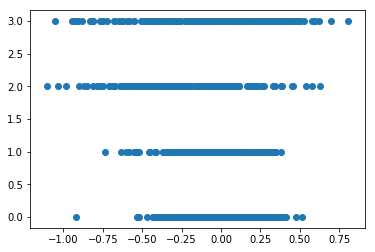

VAL_LOSS: 1.0759501457214355


1.0759501457214355

In [265]:
eval_plot()

In [266]:
learning_rate = 0.005
parameters = list(encoder.parameters())+ list(decoder.parameters())
loss_func = nn.MSELoss(size_average=True)
optimizer = torch.optim.Adam(parameters, lr=learning_rate)


--------model not restored--------

996 996


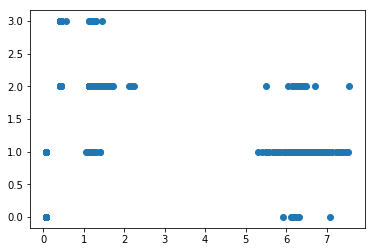

VAL_LOSS: 0.6237962245941162
Train Epoch: 0 [98000/99996 (98%)]	Loss: 0.63342839
996 996


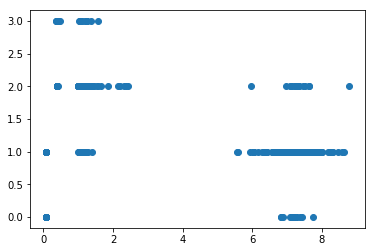

VAL_LOSS: 0.6242392659187317
Train Epoch: 1 [72000/99996 (72%)]	Loss: 0.66121137

KeyboardInterrupt: 

In [269]:
# train encoder and decoder
# save and load model
epochs = 1000

try:
    encoder, decoder = torch.load('./model/dimredux_1.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass

train_losses = []
val_losses = []
#val_loss = evaluate() 
#val_losses.append(val_loss)
eval_plot()
for epoch in range(epochs):
    encoder.train()
    decoder.train()
    for batch_idx, (x,y) in enumerate(data_loader):
        batchsize = x.size()[0]
        x,y = Variable(x),Variable(y)

        optimizer.zero_grad()
        output = encoder(x)
        output = decoder(output)
        loss = loss_func(output,y)
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss)
            
        if batch_idx % 10 == 0:
            print('\rTrain Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.8f}'.format(
                epoch, batch_idx * batch_size, len(data_loader.dataset),
                100. * batch_idx / len(data_loader), loss),end='')
        
    print()
    if epoch % 2 == 0:
        eval_plot()
    # val_loss = evaluate() 
    # val_losses.append(val_loss)
    # if val_loss < val_losses[-2]:
    #     print("taking snapshot")
    #     torch.save([encoder,decoder],'./model/deno_autoencoder-0_79.pkl')

In [268]:
learning_rate = 0.0005

In [999]:
parameters

[Parameter containing:
 tensor([[[ 0.0878, -0.2001, -0.1530,  0.0287],
          [ 0.1396,  0.0003,  0.0888, -0.1096],
          [-0.2038, -0.2108,  0.1097, -0.0632]],
 
         [[-0.1248,  0.1491,  0.1041,  0.1828],
          [-0.0366,  0.0773, -0.0201,  0.1686],
          [-0.1623,  0.1883,  0.1517, -0.0450]],
 
         [[-0.2006, -0.0966, -0.1430,  0.1260],
          [-0.1949, -0.1161,  0.0858,  0.2088],
          [ 0.1487, -0.0171, -0.0242,  0.1821]],
 
         [[-0.0260,  0.0799,  0.1568, -0.0585],
          [-0.1506,  0.0107, -0.0206, -0.1325],
          [-0.1520,  0.1926,  0.1257,  0.1822]],
 
         [[ 0.1738, -0.0814,  0.1226,  0.1364],
          [-0.1241,  0.0044, -0.0120, -0.1075],
          [ 0.1975,  0.1891, -0.0184,  0.0788]],
 
         [[ 0.1981, -0.1191, -0.1808,  0.1484],
          [ 0.0283,  0.0061,  0.0910, -0.1496],
          [ 0.1911, -0.0010, -0.0728,  0.0182]],
 
         [[ 0.1032, -0.0430, -0.1727, -0.1453],
          [-0.1808, -0.0080,  0.0575, -0.1287],

In [47]:
torch.save([encoder,decoder],'./model/TLAC-0_935.pkl')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Encoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Decoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
